### Data wrangling, which consists of:
     * Gathering data.
     * Assessing data.
     * Cleaning data.
### Storing, analyzing, and visualizing your wrangled data.
### Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations.

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import requests
import datetime
import tweepy
import os
import json
import time
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as f:
    f.write(r.content)
    
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
twt_list = []
error_list = []

start = time.time()

# will add each tweet json to twt_list
url_1 = 'https://video.udacity-data.com/topher/2018/November/5bf60cc8_tweet-json/tweet-json'
r_1 = requests.get(url_1)
with open('twitter_archive.txt', mode='wb') as f_1:
    f_1.write(r_1.content)
with open('twitter_archive.txt') as f:
    for l in f:
        try:
            
            df = json.loads(l)
            keys = df.keys()
            id_str = df.get('id_str')
            retweet_count = df['retweet_count']
            favorite_count = df['favorite_count']
            twt_list.append({'id_str':id_str,
                           'retweet_count':retweet_count,
                           'favorite_count':favorite_count})
        except Exception as e:
            print(str(id_str)+ " __ " + str(e))
            error_list.append(id_str)
        
tweet_json = pd.DataFrame(twt_list, columns=['id_str', 'retweet_count', 'favorite_count'])            
tweet_json.head()

end = time.time()
print(end - start)
tweet_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

19.165586471557617


In [6]:
tweet_json = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_json.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
print("The lengh of the result", len(twt_list))
print("The lengh of the errors", len(error_list))

The lengh of the result 2354
The lengh of the errors 0


# We finished the first step (Gathering) , then we can go to the second step which is assessing.



# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ


## There are two types of  Assessment:

1- Visual Assessment

2- Programmatic Assessment


### The issues we can face in this step are :

1- Quality

2- tidness

In [8]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1426,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carter. He wakes up in the morning and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462...,10,10,Carter,None,None,None,None
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo
1060,741438259667034112,NaN,NaN,2016-06-11 01:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's still figuring out couche...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741438259...,9,10,Tucker,None,None,None,None
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673887867...,10,10,None,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Shadoe       1
Mary         1
Trip         1
Asher        1
Binky        1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [16]:
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [17]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.expanded_urls.duplicated().sum()

137

# Twitter_Archive DataFrame



## Visual Assessment

### Quality Issues

 *  source column is not good.
 *  The text column contains the rate, text and the url that should be separated.
 *  Missing names in the name column and the 'a' and 'an' values that should be replaced.
 *  Missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url) columns.
 *  Missing values in dog stages.
 *  Remove unnecessary columns


### Tidiness Issues

 *  Dog stage exists in 4 columns (doggo, floofer, pupper, puppo).
 *  The 3 columns should be merged.




## Programmatic Assessment

### Quality Issues

 *  (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)  columns is not in appropriate type.
 *  timestamp, retweeted_status_timestamp columns should be datetime type.
 *  There are some mistakes in values for rating_numerator and rating_denominator.
 *  expanded_urls column got duplicates and links to different websites.
 

In [20]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1510,786036967502913536,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
1205,741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True


In [21]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

# image_pred DataFrame



## Visual Assessment

### Quality Issues

 *  p1, p2 and p3 columns contain uppercase and lowercase letters.
 *  Remove unnecessary columns.
 
### Tidiness Issues
 *  The 3 columns should be merged.
 


## Programmatic Assessment

### Quality Issues

 *  tweet_id should be string.


In [23]:
tweet_json.sample(5)

,id_str,retweet_count,favorite_count
97,873213775632977920,1667,7467
1660,682962037429899265,15043,26239
61,880095782870896641,4533,28150
1795,677269281705472000,790,2164
948,752173152931807232,2106,6569


In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


# tweet_json DataFrame



## Visual Assessment

### Quality Issues

 *  id_str should be replaced into tweet_id.

### Tidiness Issues
 *  The 3 columns should be merged.


## Programmatic Assessment

### Quality Issues

 *  id_str should be string.

# We finished the second step (assessing) , then we can go to the third step which is cleaning.

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# There are two types of cleaning:

  *  Manual
  *  Programmatic
  
  
# The programmatic data cleaning process:

  *  Define.
  *  Code.
  *  Test.

In [25]:
tweet_json_clean = tweet_json.copy()
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
c = twitter_archive.copy()

#### Define
  source column contain an html format, we should extract a part of them (source).

#### Code

In [26]:
source = []
for i in range(twitter_archive_clean.source.count()):
    source.append(twitter_archive_clean.source[i].split('"')[4][:-4].replace('>', ''))

In [27]:
twitter_archive_clean['source'] = source

#### Test

In [28]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
  The text column contains text, rate and shortcut_url.
  
  shortcut_url should be separated.
  
  

#### Code

In [29]:
url_short = twitter_archive_clean.text[0].split()[-1]

# separating the shortcut_url from the text column.
twitter_archive_clean['shortcut_url'] = twitter_archive_clean['text'].apply(lambda r: r[-len(url_short):])

# remove the shortcut_url from the text column.
twitter_archive_clean['text'] = twitter_archive_clean['text'].apply(lambda r: r[:-len(url_short)])


#### Test

In [30]:
twitter_archive_clean['text'].head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [31]:
twitter_archive_clean['shortcut_url'].head()

0    https://t.co/MgUWQ76dJU
1    https://t.co/0Xxu71qeIV
2    https://t.co/wUnZnhtVJB
3    https://t.co/tD36da7qLQ
4    https://t.co/AtUZn91f7f
Name: shortcut_url, dtype: object

#### Define
  There exist many names in name column called 'None' , 'a', and 'an'

#### Code

In [32]:
def find_names(df):
    list_names = []
    #iterate in each line.
    for line in twitter_archive_clean.text:
        wrong_string = ['this', 'rhododendron', 'setter', 'epispocalian', 'parthenon', 'islands', 'we', 
                               'unbelievable', 'improvement', 'airport', 'tortoise', 'christmas', '"yep', '"so', '37',
                               'pulitzer', 'oh', 'st', 'up', 'xbox', 'here', 'dogs', 'dog', 'https://t']
        
        
        # we find the index of the first ".".
        first_string = line.find('.')
        
        # if no dot is found, there might be no dog name
        if first_string == -1:
            list_names.append(np.nan)
        else:
            # we obtain the string before "." and split it into two and we obtain the last one. that is the name.
            string_before = line[:first_string].rsplit(' ', 1)[-1]
            
            if (len(string_before) > 15) or any(word in string_before for word in wrong_string) or (len(string_before) < 2):
                list_names.append(np.nan)
            else:
                list_names.append(string_before)
    return list_names

In [33]:
list_names = find_names(twitter_archive_clean)

twitter_archive_clean.name = list_names
twitter_archive_clean.name.value_counts()

Charlie    14
Oliver     12
Cooper     11
Tucker     10
Lucy       10
           ..
too         1
Chevy       1
Taz         1
Baron       1
good        1
Name: name, Length: 1260, dtype: int64

#### Test

In [34]:
twitter_archive_clean[twitter_archive_clean.name == 'None']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,shortcut_url


#### Define
  rating_numerator and rating_denominator columns have incorrect values (rating_denominator must have 10).
  
  we extract the correct values from the text column.

#### Code

In [35]:
# we extract the correct values from the text column.
archive_format = twitter_archive_clean.text.str.contains("\d+/10")

# we obtain the values that match with our DataFrame.
twitter_archive_clean = twitter_archive_clean[archive_format]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

#### Test

In [36]:
twitter_archive_clean.rating_denominator.sample(10)

321     10
2247    10
805     10
4       10
1679    10
1111    10
1413    10
1609    10
1225    10
1760    10
Name: rating_denominator, dtype: int64

In [37]:
twitter_archive_clean[twitter_archive_clean.rating_numerator > 15]['rating_numerator']

55        17
188      420
695       75
763       27
979     1776
1712      26
2074     420
Name: rating_numerator, dtype: int64

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2270 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2270 non-null int64
in_reply_to_status_id         37 non-null float64
in_reply_to_user_id           37 non-null float64
timestamp                     2270 non-null object
source                        2270 non-null object
text                          2270 non-null object
retweeted_status_id           154 non-null float64
retweeted_status_user_id      154 non-null float64
retweeted_status_timestamp    154 non-null object
expanded_urls                 2252 non-null object
rating_numerator              2270 non-null int64
rating_denominator            2270 non-null int64
name                          1865 non-null object
doggo                         2270 non-null object
floofer                       2270 non-null object
pupper                        2270 non-null object
puppo                         2270 non-null object
shortcut_url                  22

#### Define
  tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns should be converted into string because i don't need them in arithmetic operations.

#### Code

In [39]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('str')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('str')
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype('str')
twitter_archive_clean.retweeted_status_user_id =  twitter_archive_clean.retweeted_status_user_id.astype('str')
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2270 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2270 non-null object
in_reply_to_status_id         2270 non-null object
in_reply_to_user_id           2270 non-null object
timestamp                     2270 non-null datetime64[ns, UTC]
source                        2270 non-null object
text                          2270 non-null object
retweeted_status_id           2270 non-null object
retweeted_status_user_id      2270 non-null object
retweeted_status_timestamp    154 non-null datetime64[ns, UTC]
expanded_urls                 2252 non-null object
rating_numerator              2270 non-null int64
rating_denominator            2270 non-null int64
name                          1865 non-null object
doggo                         2270 non-null object
floofer                       2270 non-null object
pupper                        2270 non-null object
puppo                         2270 non-null object
sho

#### Define
  Dog stage exists in 4 columns (doggo, floofer, pupper, puppo). We should combine them in one column.

#### Code

In [41]:
# we create an empty column to append these columns in this column.
twitter_archive_clean['dog_stage'] = pd.np.empty((twitter_archive_clean.shape[0], 0)).tolist()


twitter_archive_clean.reset_index(drop = True, inplace = True)

# we create a list of dog type for more comfortable with for loop.
dog_type =['doggo', 'floofer', 'pupper', 'puppo']

for i in range(twitter_archive_clean.shape[0]):
    for j in dog_type:
        
        # we ensure that dog type exists in at least on of these four columns.
        if j in twitter_archive_clean.loc[i, ['doggo', 'floofer', 'pupper', 'puppo']].tolist():
            
            # we add them in an empty column.
            twitter_archive_clean.loc[i, 'dog_stage'].append(j)
        else:
            continue
            
    # we consider that there exist 22 of dog types in one row so we separate them by ','.        
    twitter_archive_clean.loc[i, 'dog_stage'] = ', '.join(twitter_archive_clean.loc[i, 'dog_stage'])
    
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('', np.nan)

twitter_archive_clean.drop(dog_type, axis=1, inplace=True)

In [42]:
# we should convert column type into category for more comfortable when we dealing with.
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')


#### Test

In [43]:
twitter_archive_clean[twitter_archive_clean.dog_stage.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,shortcut_url,dog_stage
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://t.co/t1bfwz5S2A,doggo
12,889665388333682689,nan,nan,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,nan,nan,NaT,https://twitter.com/dog_rates/status/889665388...,13,10,her,https://t.co/BxvuXk0UCm,puppo
14,889531135344209921,nan,nan,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,nan,nan,NaT,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,https://t.co/y70o6h3isq,puppo
29,886366144734445568,nan,nan,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,nan,nan,NaT,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,https://t.co/RGE08MIJox,pupper
43,884162670584377345,nan,nan,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,nan,nan,NaT,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,https://t.co/YSI00BzTBZ,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,672594978741354496,nan,nan,2015-12-04 01:55:13+00:00,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,nan,nan,NaT,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,https://t.co/jyXbZ35MYz,pupper
1919,672481316919734272,nan,nan,2015-12-03 18:23:34+00:00,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,nan,nan,NaT,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,https://t.co/mVCMemhXAP,pupper
1926,672254177670729728,nan,nan,2015-12-03 03:21:00+00:00,Twitter for iPhone,This is Rolf. He's having the time of his life...,nan,nan,NaT,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,https://t.co/OO6MqEbqG3,pupper
1932,672205392827572224,nan,nan,2015-12-03 00:07:09+00:00,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,nan,nan,NaT,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,https://t.co/yRBQF9OS7D,pupper


#### Define
  p1, p2 and p3 columns contain uppercase and lowercase letters. we should convert all of them into lowercase.

#### Code

In [44]:
image_pred_clean.p1 = image_pred_clean.p1.str.lower()
image_pred_clean.p2 = image_pred_clean.p2.str.lower()
image_pred_clean.p3 = image_pred_clean.p3.str.lower()

#### Test

In [45]:
image_pred_clean.p1.value_counts()

golden_retriever       150
labrador_retriever     100
pembroke                89
chihuahua               83
pug                     57
                      ... 
ibex                     1
african_hunting_dog      1
revolver                 1
boathouse                1
padlock                  1
Name: p1, Length: 378, dtype: int64

In [46]:
image_pred_clean.p2.value_counts()

labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
                     ... 
volcano                 1
tarantula               1
menu                    1
toucan                  1
shower_cap              1
Name: p2, Length: 404, dtype: int64

In [47]:
image_pred_clean.p3.value_counts()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
french_horn            1
wing                   1
sea_cucumber           1
hand-held_computer     1
padlock                1
Name: p3, Length: 408, dtype: int64

#### Define
  tweet_id column should be string.

#### Code

In [48]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('str')

#### Test

In [49]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
  we renamed id_str column to tweet_id for more comfortable with merging.
  
  we converted tweet_id column into string.

#### Code

In [50]:
tweet_json_clean.rename(columns={'id_str':'tweet_id'}, inplace=True)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype('str')

#### Test

In [51]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define
  we should merge these three tables into one table.

#### Code

In [52]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean, how='left', on='tweet_id')

In [53]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_pred_clean, how='inner', on='tweet_id')

#### Test

In [54]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


#### Define
  drop unnecessary columns.
  
  Rename some columns to more meaningful names.

#### Code

In [55]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'p1_dog'], axis=1, inplace=True)

In [56]:
twitter_archive_clean.rename(columns={'p1':'prediction',
                                      'p1_conf':'confidence'}, inplace=True)

#### Test

In [57]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,shortcut_url,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 16 columns):
tweet_id              2057 non-null object
timestamp             2057 non-null datetime64[ns, UTC]
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  1712 non-null object
shortcut_url          2057 non-null object
dog_stage             321 non-null category
retweet_count         2055 non-null float64
favorite_count        2055 non-null float64
jpg_url               2057 non-null object
img_num               2057 non-null int64
prediction            2057 non-null object
confidence            2057 non-null float64
dtypes: category(1), datetime64[ns, UTC](1), float64(3), int64(3), object(8)
memory usage: 259.5+ KB


In [59]:
# Save the file
twitter_archive_clean.to_csv('Project/twitter_archive_master.csv', index=False)

In [60]:
archive = pd.read_csv('Project/twitter_archive_master.csv')

In [61]:
archive.name.value_counts()

Charlie    13
Oliver     11
Tucker     10
Cooper     10
Penny       9
           ..
kiss        1
Stefan      1
Tove        1
Newt        1
Hurley      1
Name: name, Length: 1180, dtype: int64

In [62]:
archive.name.value_counts().head(7)

Charlie    13
Oliver     11
Tucker     10
Cooper     10
Penny       9
Lucy        9
Daisy       8
Name: name, dtype: int64

In [65]:
Dogs_names = archive.name.value_counts().head(7)
Dogs_names

Charlie    13
Oliver     11
Tucker     10
Cooper     10
Penny       9
Lucy        9
Daisy       8
Name: name, dtype: int64

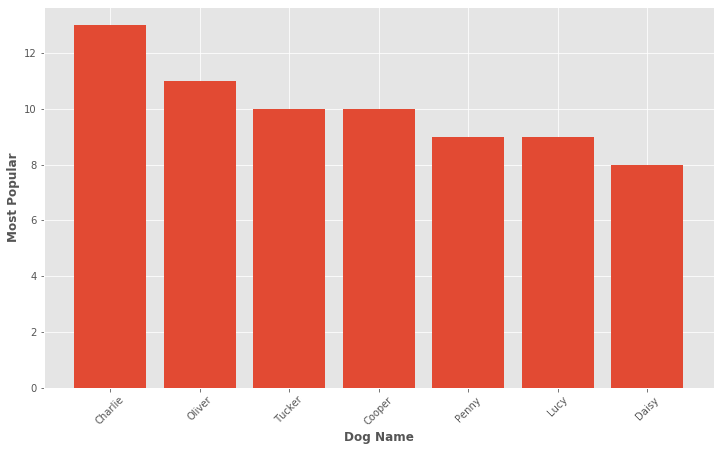

In [68]:
plt.subplots(figsize=(12, 7))
plt.bar([1, 2, 3, 4, 5, 6, 7], Dogs_names, tick_label=['Charlie', 'Oliver', 'Tucker', 'Cooper', 'Penny', 'Lucy','Daisy'])
plt.xticks(rotation = 45)
plt.xlabel('Dog Name', weight='bold')
plt.ylabel('Most Popular', weight='bold')
plt.savefig('Project/most_popu_names.png')

In [70]:
count_dog_stage = archive.groupby('dog_stage')['tweet_id'].count()
count_dog_stage

dog_stage
doggo              67
doggo, floofer      1
doggo, pupper      11
doggo, puppo        1
floofer             7
pupper            211
puppo              23
Name: tweet_id, dtype: int64

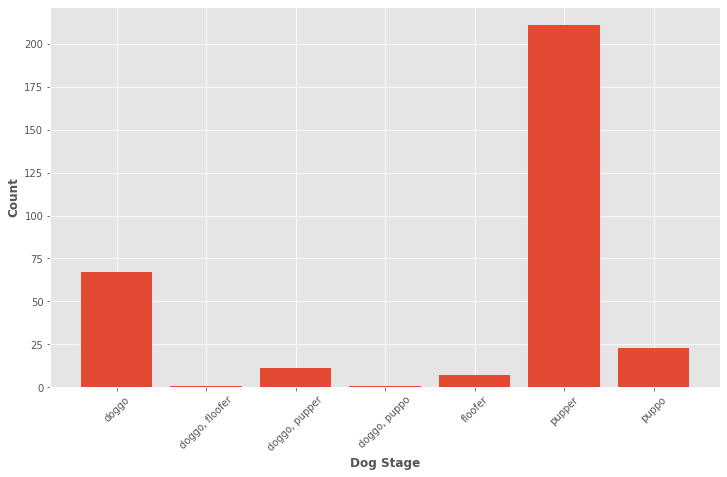

In [98]:
# plotting dog stage count.
plt.subplots(figsize=(12, 7))
plt.bar([1, 2, 3, 4, 5, 6, 7], count_dog_stage, tick_label=['doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo', 'floofer','pupper', 'puppo'])
plt.xticks(rotation = 45)
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.savefig('Project/most_popu_stages.png')

In [72]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,shortcut_url,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [70]:
# This method can get you count and favourite retweets over time for easy plotting.
archive.timestamp = pd.to_datetime(archive.timestamp)
retweets = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
.reset_index().sort_values('timestamp')[:-1]
favourite = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum()\
.reset_index().sort_values('timestamp')[:-1]


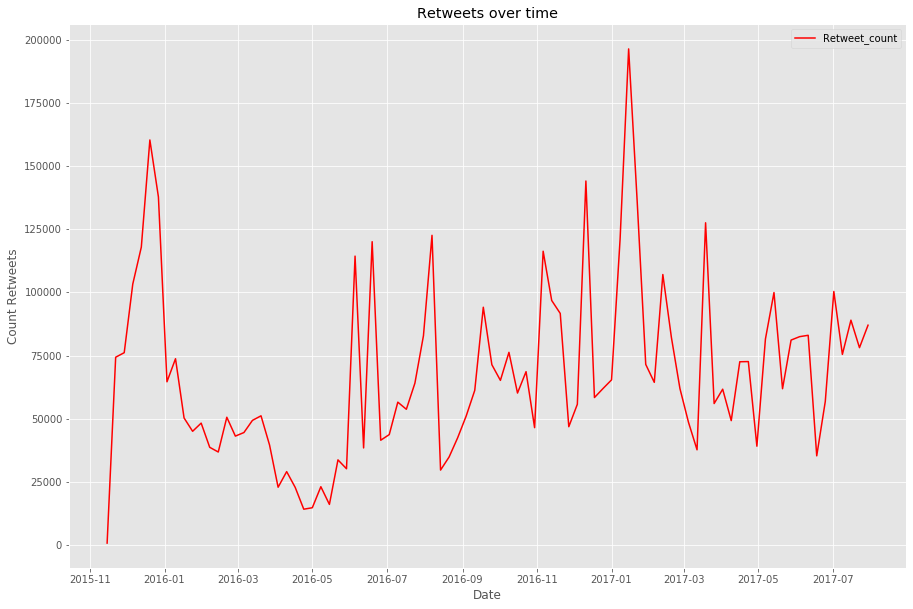

In [94]:
# plotting retweet count over time.
plt.subplots(figsize=(15, 10))
plt.plot(retweets.timestamp, retweets.retweet_count, label='Retweet_count', color='r')
plt.title('Retweets over time')
plt.xlabel('Date')
plt.ylabel('Count Retweets')
plt.legend()
plt.savefig('Project/count_retweet.png')

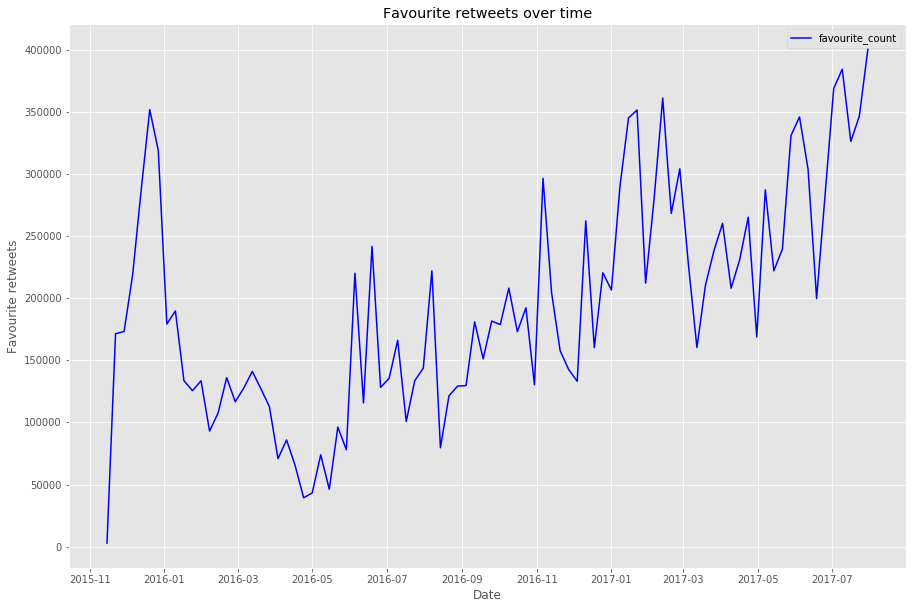

In [95]:
# plotting favourite retweets over time.
plt.subplots(figsize=(15, 10))
plt.plot(favourite.timestamp, favourite.favorite_count, label='favourite_count', color='b')
plt.title('Favourite retweets over time')
plt.xlabel('Date')
plt.ylabel('Favourite retweets')
plt.legend()
plt.savefig('Project/favourite_retweet.png')

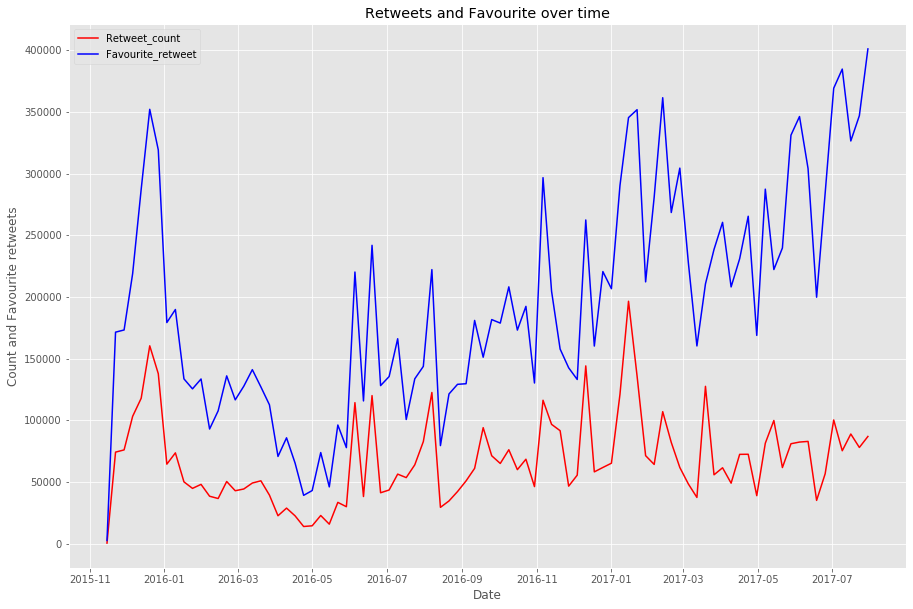

In [96]:
# comparing favourite and count of retweets over time.
plt.subplots(figsize=(15, 10))
plt.plot(retweets.timestamp, retweets.retweet_count, label='Retweet_count', color='r')
plt.plot(favourite.timestamp, favourite.favorite_count, label='Favourite_retweet', color='b')
plt.title('Retweets and Favourite over time')
plt.xlabel('Date')
plt.ylabel('Count and Favourite retweets')
plt.legend()
plt.savefig('Project/count_favourite_retweet.png')